In [59]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from src.data_preprocessing import clean_telecom_data, data_assessment
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)



# Initial data Access and Assessment

In [61]:
filepath = '../data/raw/telecom_market_data.csv'
df = pd.read_csv(filepath,dtype={5: str})
df.head()

,year,month,circle,type_of_connection,service_provider,value,unit,notes
0,2025,April,Andhra Pradesh,wireless,Bharti Airtel (Including Tata Tele.),33965795,value in absolute number,NaN
1,2025,April,Assam,wireless,Bharti Airtel (Including Tata Tele.),12314102,value in absolute number,NaN
2,2025,April,Bihar,wireless,Bharti Airtel (Including Tata Tele.),40967773,value in absolute number,NaN
3,2025,April,Delhi,wireless,Bharti Airtel (Including Tata Tele.),18877637,value in absolute number,NaN
4,2025,April,Gujarat,wireless,Bharti Airtel (Including Tata Tele.),12401101,value in absolute number,NaN


## Initial Data Assessment

In [62]:

initial_assessment_report = data_assessment(df)
initial_assessment_report


,Column,Data Type,Non-Null Count,Null Count,Unique Values,outliers,Sample Values
0,year,int64,70728,0,17,0,"[2025, 2024, 2023, 2022, 2021]"
1,month,object,70728,0,12,N/A,"[April, March, February, January, December]"
2,circle,object,70728,0,38,N/A,"[Andhra Pradesh, Assam, Bihar, Delhi, Gujarat]"
3,type_of_connection,object,70728,0,2,N/A,"[wireless, wireline]"
4,service_provider,object,70728,0,42,N/A,"[Bharti Airtel (Including Tata Tele.), Relianc..."
5,value,object,58396,12332,47175,N/A,"[33965795, 12314102, 40967773, 18877637, 12401..."
6,unit,object,70728,0,1,N/A,[value in absolute number]
7,notes,object,511,70217,69,N/A,[service_provider: License of M/s Loop Mobile ...


# Data Cleaning

In [63]:
df_clean = clean_telecom_data(df.copy())
cleaned_assessment_report = data_assessment(df_clean)
cleaned_assessment_report

Data cleaning completed.


,Column,Data Type,Non-Null Count,Null Count,Unique Values,outliers,Sample Values
0,date,datetime64[ns],64900,0,196,N/A,"[2025-04-01 00:00:00, 2025-03-01 00:00:00, 202..."
1,circle,object,64900,0,28,N/A,"[Andhra Pradesh, Assam, Bihar, Delhi, Gujarat]"
2,type_of_connection,object,64900,0,2,N/A,"[wireless, wireline]"
3,service_provider,object,64900,0,42,N/A,"[BHARTI AIRTEL (INCLUDING TATA TELE.), RELIANC..."
4,value,float64,64900,0,47105,7307,"[33965795.0, 12314102.0, 40967773.0, 18877637...."


In [64]:
df_clean.head(5)

,date,circle,type_of_connection,service_provider,value
0,2025-04-01,Andhra Pradesh,wireless,BHARTI AIRTEL (INCLUDING TATA TELE.),33965795.0
1,2025-04-01,Assam,wireless,BHARTI AIRTEL (INCLUDING TATA TELE.),12314102.0
2,2025-04-01,Bihar,wireless,BHARTI AIRTEL (INCLUDING TATA TELE.),40967773.0
3,2025-04-01,Delhi,wireless,BHARTI AIRTEL (INCLUDING TATA TELE.),18877637.0
4,2025-04-01,Gujarat,wireless,BHARTI AIRTEL (INCLUDING TATA TELE.),12401101.0


# Market Share Analysis

## OverAll Subscribers

In [65]:
from src.data_preprocessing import analyze_market_share
df_market, df_hhi = analyze_market_share(df_clean)
df_market.head(5)

,date,circle,type_of_connection,service_provider,value,total_circle_subscriber,market_share,num_competitors
0,2025-04-01,Andhra Pradesh,wireless,BHARTI AIRTEL (INCLUDING TATA TELE.),33965795.0,177660357.0,0.191184,9
1,2025-04-01,Assam,wireless,BHARTI AIRTEL (INCLUDING TATA TELE.),12314102.0,117699763.0,0.104623,6
2,2025-04-01,Bihar,wireless,BHARTI AIRTEL (INCLUDING TATA TELE.),40967773.0,188900572.0,0.216875,8
3,2025-04-01,Delhi,wireless,BHARTI AIRTEL (INCLUDING TATA TELE.),18877637.0,69209352.0,0.272761,8
4,2025-04-01,Gujarat,wireless,BHARTI AIRTEL (INCLUDING TATA TELE.),12401101.0,68316846.0,0.181523,8


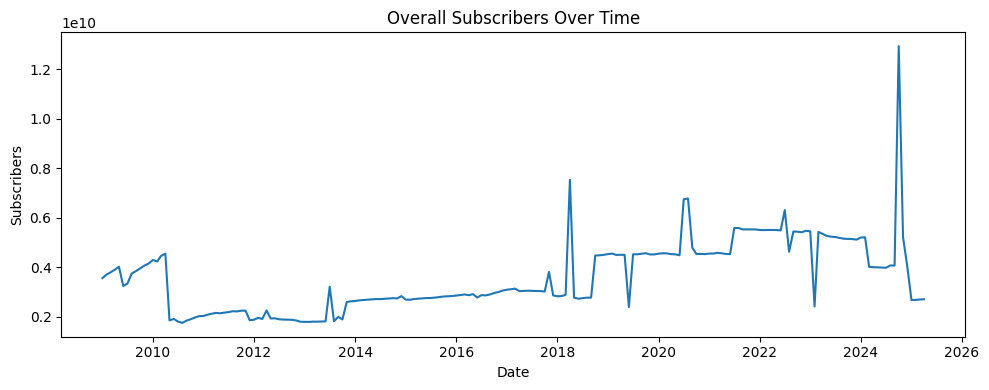

<Figure size 640x480 with 0 Axes>

In [66]:

df_grouped = df_market.groupby('date')['value'].sum().reset_index()

plt.figure(figsize=(10, 4))

sns.lineplot(data=df_grouped, x='date', y='value')
plt.title("Overall Subscribers Over Time")
plt.xlabel("Date")
plt.ylabel("Subscribers")
plt.tight_layout()
plt.show()
plt.savefig("../reports/figures/overall_subscribers_trend.png", dpi=300, bbox_inches='tight')


Time-Series Analysis: Telecom Subscriber Volume
1. 🗓️ Date Range
- Start: 2009-01-01
- End: 2025-04-01
- Duration: 16 years, 4 months
- Frequency: Monthly (196 data points)

2. 📊 Trend Overview
- 2009–2016: Steady growth from ~3.55B to ~4.0B subscribers
- 2016–2024: Plateauing around ~4.05B — market saturation likely
- 2025: Sudden drop to ~2.67B — potential anomaly or structural shift
3. ⚠️ Inflection Point
- Jan 2025 onward:
- Drop from ~4.05B (Dec 2024) to ~2.67B (Jan 2025)
- Continues flat around ~2.69B through April 2025
- 📌 Hypothesis: Could be due to:
- Data reclassification (e.g., excluding inactive SIMs)
- Regulatory change (e.g., subscriber definition update)
- Business event (e.g., mass churn, provider exit)


In [67]:
int(df_grouped['value'].max())

12929712744

That value — 12.9 billion subscribers — is almost certainly not possible in the context of telecom subscriber data for India or any single market.

🚨 Why It’s Likely an Error or Artifact
1. India’s Population ≈ 1.4 billion
- Even accounting for multiple SIMs per person, 12.9B is nearly 10× the population.
2. Historical Trend
- Your previous values hovered around 4.0B (likely counting cumulative or multi-provider totals).
- A sudden jump to 12.9B in Oct 2024 is a massive spike — likely a data entry error, unit mismatch, or aggregation glitch.
3. No Global Telecom Market Hits That
- Even globally, total mobile subscriptions are estimated around 8–9B, not 12.9B in one country.



## Top 5 Operators

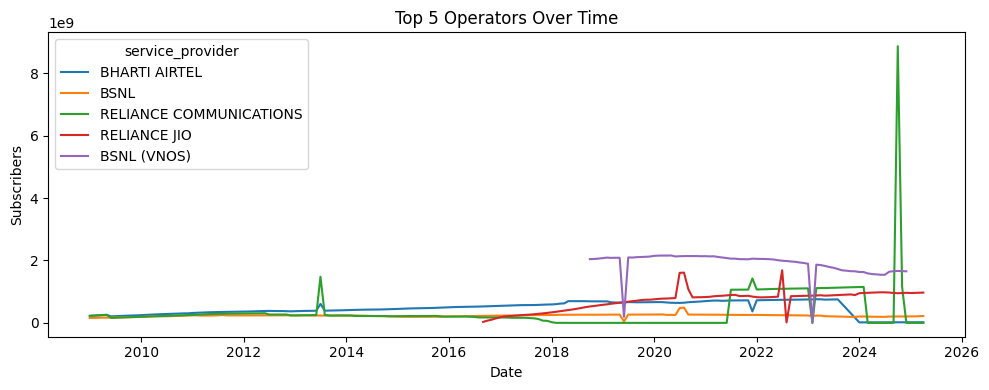

<Figure size 640x480 with 0 Axes>

In [68]:
top_operators = df_market.groupby('service_provider')['value'].sum().nlargest(5).index
df_top = df_market[df_market['service_provider'].isin(top_operators)]
df_top_grouped = df_top.groupby(['date', 'service_provider'])['value'].sum().reset_index()

plt.figure(figsize=(10, 4))
sns.lineplot(data=df_top_grouped, x='date', y='value', hue='service_provider')
plt.title("Top 5 Operators Over Time")
plt.xlabel("Date")
plt.ylabel("Subscribers")
plt.tight_layout()
plt.show()
plt.savefig("../reports/figures/Top_5_Operators_trend.png", dpi=300, bbox_inches='tight')

📈 Key Observations
🔹 Early Leaders (2009)
- RELIANCE COMMUNICATIONS: ~226M
- BHARTI AIRTEL: ~225M
- BSNL: ~158M
- 📌 Reliance Comm and Airtel were neck-and-neck in early 2009.

🔹 Rise of Jio
- RELIANCE JIO appears later in the dataset (likely post-2016).
- By 2025-04, Jio has ~971M subscribers — dominating the market.

🔹 Decline of Legacy Players
- RELIANCE COMMUNICATIONS drops to ~202K by 2025 — near extinction.
- BHARTI AIRTEL shows a sharp dip in April 2025 (~20M), possibly an anomaly or data issue.
- BSNL hovers around ~220M in 2025 — stable but not growing.


## Market Type

In [69]:

bins = [0, 0.15, 0.25, 1]
labels = ['Competitive', 'Moderately Concentrated', 'Highly Concentrated']
df_hhi['market_type'] = pd.cut(df_hhi['HHI'], bins=bins, labels=labels)
df_market_enriched = pd.merge(
    df_market,
    df_hhi[['date', 'circle', 'HHI', 'market_type']],
    on=['date', 'circle'],
    how='left'
)
df_market_enriched

,date,circle,type_of_connection,service_provider,value,total_circle_subscriber,market_share,num_competitors,HHI,market_type
0,2025-04-01,Andhra Pradesh,wireless,BHARTI AIRTEL (INCLUDING TATA TELE.),33965795.0,177660357.0,0.191184,9,0.335199,Highly Concentrated
1,2025-04-01,Assam,wireless,BHARTI AIRTEL (INCLUDING TATA TELE.),12314102.0,117699763.0,0.104623,6,0.615126,Highly Concentrated
2,2025-04-01,Bihar,wireless,BHARTI AIRTEL (INCLUDING TATA TELE.),40967773.0,188900572.0,0.216875,8,0.330950,Highly Concentrated
3,2025-04-01,Delhi,wireless,BHARTI AIRTEL (INCLUDING TATA TELE.),18877637.0,69209352.0,0.272761,8,0.225713,Moderately Concentrated
4,2025-04-01,Gujarat,wireless,BHARTI AIRTEL (INCLUDING TATA TELE.),12401101.0,68316846.0,0.181523,8,0.317253,Highly Concentrated
...,...,...,...,...,...,...,...,...,...,...
64895,2009-01-01,Uttar Pradesh (East),wireline,BSNL,1440296.0,41641400.0,0.034588,14,0.115050,Competitive
64896,2009-01-01,Uttar Pradesh (West),wireline,BSNL,940266.0,32753127.0,0.028708,14,0.115283,Competitive
64897,2009-01-01,Uttarakhand,wireline,BSNL,300884.0,31147009.0,0.009660,12,0.124293,Competitive
64898,2009-01-01,West Bengal,wireline,BSNL,1038499.0,26421795.0,0.039305,14,0.104623,Competitive


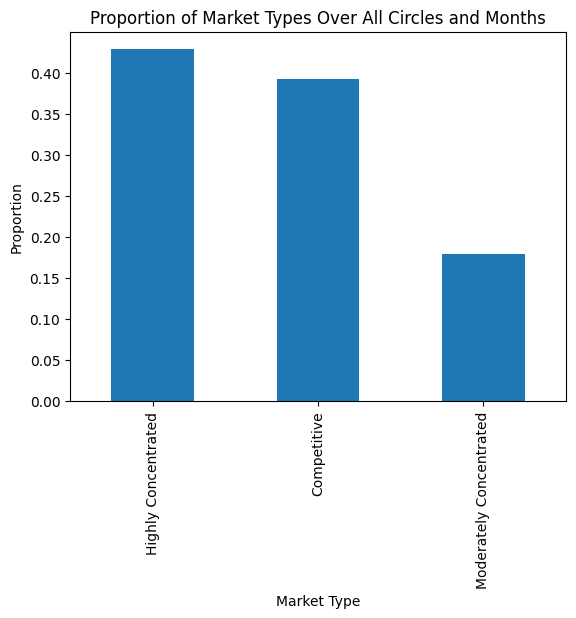

In [76]:
df_market_enriched['market_type'].value_counts(normalize = True).plot(kind='bar')
plt.xlabel("Market Type")
plt.ylabel("Proportion")
plt.title("Proportion of Market Types Over All Circles and Months")
plt.savefig("../reports/figures/market_type_proportion.png", dpi=300, bbox_inches='tight');

## Top Circles over time

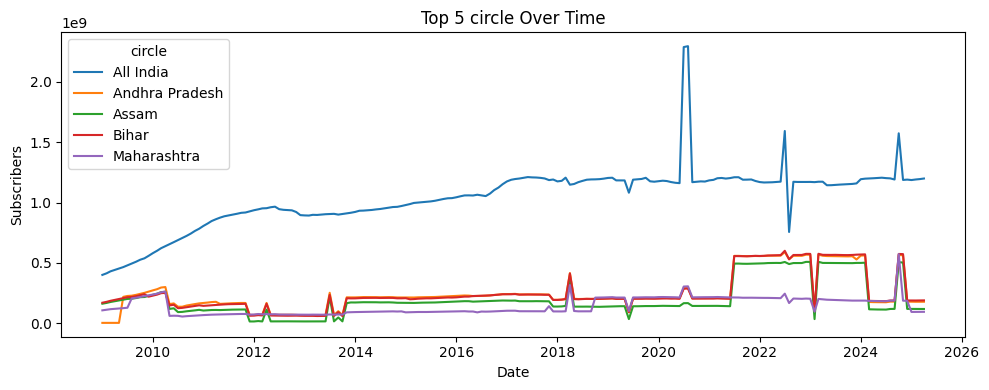

<Figure size 640x480 with 0 Axes>

In [77]:
top_circles = df_market.groupby('circle')['value'].sum().nlargest(5).index
df_top_circle = df_market[df_market['circle'].isin(top_circles)]
df_top_circle = df_top_circle.groupby(['date', 'circle'])['value'].sum().reset_index()
plt.figure(figsize=(10, 4))
sns.lineplot(data=df_top_circle, x='date', y='value', hue='circle')
plt.title("Top 5 circle Over Time")
plt.xlabel("Date")
plt.ylabel("Subscribers")
plt.tight_layout()
plt.show()
plt.savefig("../reports/figures/Top_5_Circle_trend.png", dpi=300, bbox_inches='tight')

 National Growth Trajectory
- 2009-01: All India = ~400 million subscribers
- 2025-04: All India = ~1.2 billion subscribers
- 📌 3× growth over 16 years — driven by:
- Mobile penetration in rural areas
- Smartphone adoption
- Entry of new players (e.g., Reliance Jio)
- Government initiatives (Digital India, BharatNet)

🧭 Circle-Level Insights

🔹 Maharashtra
- 2009-01: ~106M
- 2025-04: ~94M
- 📉 Slight decline — possibly due to:
- Subscriber migration
- Circle reclassification
- Data reporting changes

🔹 Bihar
- 2009-01: ~169M
- 2025-04: ~189M
- 📈 Growth — reflects expanding rural connectivit

🔹 Assam
- 2009-01: ~161M
- 2025-04: ~117M
- 📉 Decline — may indicate market saturation or operator exits

🔹 Andhra Pradesh
- 2009-01: ~2.5M
- 2025-04: ~177M
- 🚀 Massive growth — likely due to early underreporting or data normalization


# Time Series patterns

In [84]:
from src.data_preprocessing import analyze_temporal_patterns
df_temporal = analyze_temporal_patterns(df_market.copy())
df_temporal.head(10)

,date,circle,type_of_connection,service_provider,value,total_circle_subscriber,market_share,num_competitors,subscriber_change,month_num,quarter,subscribers_ma_3,subscribers_ma_6,subscribers_ma_12
47406,2009-01-01,All India,wireless,AIRCEL,16761397.0,400045117.0,0.041899,15,NaN,1,1,1.676140e+07,1.676140e+07,1.676140e+07
47058,2009-02-01,All India,wireless,AIRCEL,17099390.0,413466301.0,0.041356,15,0.020165,2,1,1.693039e+07,1.693039e+07,1.693039e+07
46710,2009-03-01,All India,wireless,AIRCEL,18478325.0,429725181.0,0.043000,15,0.080642,3,1,1.744637e+07,1.744637e+07,1.744637e+07
46362,2009-04-01,All India,wireless,AIRCEL,19585299.0,441475184.0,0.044363,16,0.059907,4,2,1.838767e+07,1.798110e+07,1.798110e+07
46014,2009-05-01,All India,wireless,AIRCEL,20685711.0,452911165.0,0.045673,16,0.056186,5,2,1.958311e+07,1.852202e+07,1.852202e+07
45676,2009-06-01,All India,wireless,AIRCEL,21798731.0,464825338.0,0.046897,16,0.053806,6,2,2.068991e+07,1.906814e+07,1.906814e+07
45388,2009-07-01,All India,wireless,AIRCEL,23101900.0,479070905.0,0.048222,16,0.059782,7,3,2.186211e+07,2.012489e+07,1.964439e+07
45100,2009-08-01,All India,wireless,AIRCEL,24415514.0,494069898.0,0.049417,15,0.056862,8,3,2.310538e+07,2.134425e+07,2.024078e+07
44836,2009-09-01,All India,wireless,AIRCEL,25728633.0,509032539.0,0.050544,15,0.053782,9,3,2.441535e+07,2.255263e+07,2.085054e+07
44572,2009-10-01,All India,wireless,AIRCEL,27746797.0,525650418.0,0.052786,15,0.078440,10,4,2.596365e+07,2.391288e+07,2.154017e+07


In [86]:
df_temporal.to_csv('../data/interim/telecom_market_temporal_patterns.csv', index=False)